In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
gdp = pd.read_csv('data/gdp.csv')
gdp.head()

,date,y
0,1/1/60,3277.847
1,4/1/60,3260.177
2,7/1/60,3276.133
3,10/1/60,3234.087
4,1/1/61,3255.914


In [3]:
gdp['time'] = pd.Series(range(1, len(gdp) + 1, 1))
gdp

,date,y,time
0,1/1/60,3277.847,1
1,4/1/60,3260.177,2
2,7/1/60,3276.133,3
3,10/1/60,3234.087,4
4,1/1/61,3255.914,5
...,...,...,...
247,10/1/21,20006.181,248
248,1/1/22,19924.088,249
249,4/1/22,19895.271,250
250,7/1/22,20054.663,251


In [4]:
gdp['quarter'] = gdp.date.str.split('/').str[0]
gdp.head()

,date,y,time,quarter
0,1/1/60,3277.847,1,1
1,4/1/60,3260.177,2,4
2,7/1/60,3276.133,3,7
3,10/1/60,3234.087,4,10
4,1/1/61,3255.914,5,1


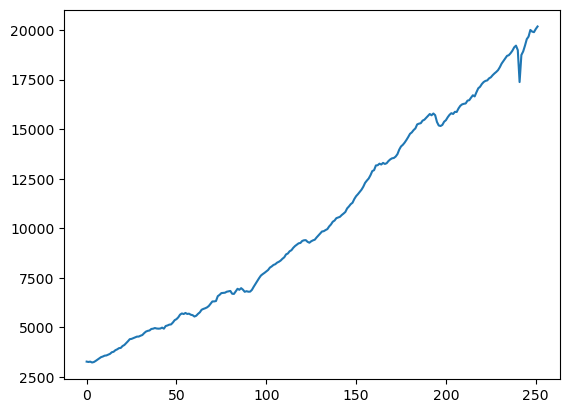

In [5]:
gdp.y.plot()
plt.show()

In [6]:
reg1 = smf.ols('y ~ time + C(quarter)', data=gdp).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3189.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          3.16e-211
Time:                        14:30:36   Log-Likelihood:                -2006.5
No. Observations:                 252   AIC:                             4023.
Df Residuals:                     247   BIC:                             4041.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1772.7634    116.552     15.210      0.000    1543.202    2002.325
C(quarter)[T.10]     4.6705    125.030      0.037      0.970    -241.590     250.931
C(quarter)[T.4]    -18.1716    125.018     -0.145      0.885    -264.409     228.066
C(quarter)[T.7]      5.2022    125.022      0.042      0.967    -241.044     251.448
time                68.6233      0.608    112.929      0.000      67.426      69.820
==============================================================================
Omnibus:                      103.764   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.263
Skew:                          -0.025   Prob(JB):                     0.000799
Kurtosis:                       1.836   Cond. No.                         647.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
gdp.tail()

,date,y,time,quarter
247,10/1/21,20006.181,248,10
248,1/1/22,19924.088,249,1
249,4/1/22,19895.271,250,4
250,7/1/22,20054.663,251,7
251,10/1/22,20182.491,252,10


In [8]:
reg1.params['Intercept'] + reg1.params['time'] * 253

19134.458023681524

In [9]:
pred = reg1.get_prediction().summary_frame()
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1841.386665,116.156446,1612.603215,2070.170114,440.591211,3242.182118
1,1891.838347,116.156446,1663.054898,2120.621797,491.042894,3292.633800
2,1983.835474,116.156446,1755.052025,2212.618924,583.040021,3384.630927
3,2051.927109,116.156446,1823.143659,2280.710559,651.131656,3452.722562
4,2115.879861,114.594593,1890.172659,2341.587062,715.583544,3516.176178
...,...,...,...,...,...,...
247,18796.012076,114.594593,18570.304874,19021.719277,17395.715759,20196.308393
248,18859.964828,116.156446,18631.181378,19088.748277,17459.169374,20260.760281
249,18910.416510,116.156446,18681.633061,19139.199960,17509.621057,20311.211963
250,19002.413637,116.156446,18773.630188,19231.197087,17601.618184,20403.209090


<function matplotlib.pyplot.show(close=None, block=None)>

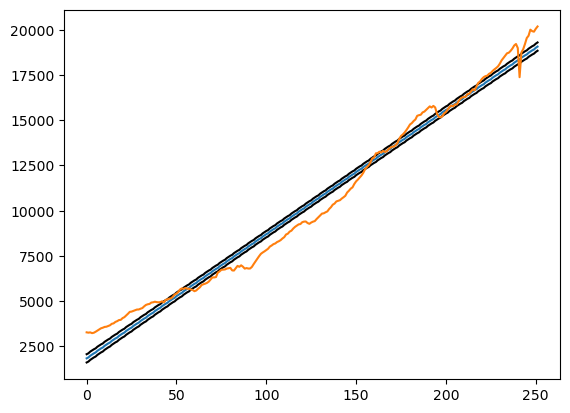

In [10]:
pred['mean'].plot()
pred['mean_ci_lower'].plot(color='black')
pred['mean_ci_upper'].plot(color='black')
gdp.y.plot()
plt.show

In [11]:
gap = pd.read_csv('data/gap_revenues.csv')
gap.head()

,year,quarter,revenue,time
0,1994,1,751670,1
1,1994,2,773131,2
2,1994,3,988346,3
3,1994,4,1060230,4
4,1995,1,848688,5


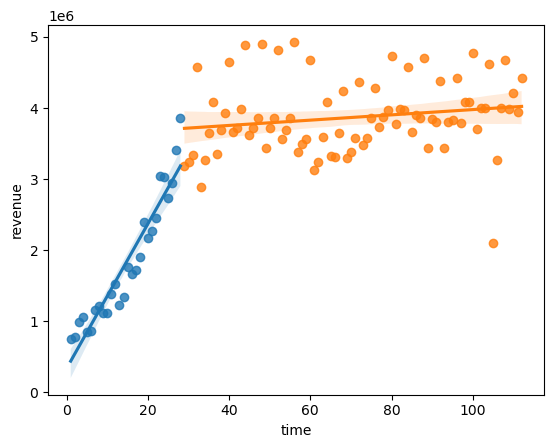

In [12]:
period1 = gap.year <= 2000
period2 = gap.year > 2000
sns.regplot(x=gap.time[period1], y=gap.revenue[period1])
sns.regplot(x=gap.time[period2], y=gap.revenue[period2])
plt.show()

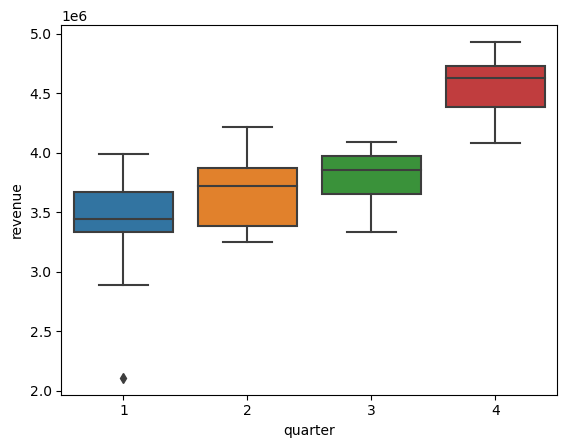

In [13]:
sns.boxplot(x=gap.quarter[period2], y=gap.revenue[period2])
plt.show()

In [14]:
reg2 = smf.ols('revenue ~ time + C(quarter)', data=gap).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     40.87
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           9.47e-21
Time:                        14:30:37   Log-Likelihood:                -1663.4
No. Observations:                 112   AIC:                             3337.
Df Residuals:                     107   BIC:                             3350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.661e+06   1.73e+05      9.594      0.000    1.32e+06       2e+06
C(quarter)[T.2]   1.84e+05   1.86e+05      0.986      0.326   -1.86e+05    5.54e+05
C(quarter)[T.3]  3.706e+05   1.87e+05      1.987      0.049     901.261     7.4e+05
C(quarter)[T.4]  9.187e+05   1.87e+05      4.924      0.000    5.49e+05    1.29e+06
time             2.346e+04   2040.386     11.496      0.000    1.94e+04    2.75e+04
==============================================================================
Omnibus:                        2.799   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.755
Skew:                          -0.375   Prob(JB):                        0.252
Kurtosis:                       2.837   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

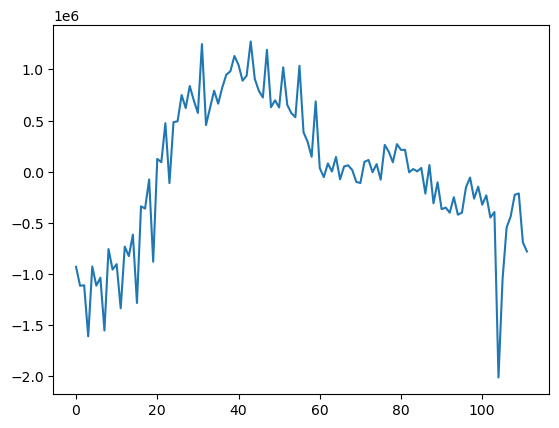

In [15]:
reg2.resid.plot()
plt.show()

In [16]:
u = reg2.resid
u[u==u.min()]

104   -2.017170e+06
dtype: float64

In [17]:
gap['covid'] = gap.time == 105
gap

,year,quarter,revenue,time,covid
0,1994,1,751670,1,False
1,1994,2,773131,2,False
2,1994,3,988346,3,False
3,1994,4,1060230,4,False
4,1995,1,848688,5,False
...,...,...,...,...,...
107,2020,4,4674000,108,False
108,2021,1,3991000,109,False
109,2021,2,4211000,110,False
110,2021,3,3943000,111,False


In [18]:
reg3 = smf.ols('revenue~time + C(quarter) + covid', data=gap).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     37.23
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           7.17e-22
Time:                        14:30:37   Log-Likelihood:                -1658.5
No. Observations:                 112   AIC:                             3329.
Df Residuals:                     106   BIC:                             3345.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.687e+06   1.67e+05     10.115      0.000    1.36e+06    2.02e+06
C(quarter)[T.2]  1.066e+05   1.81e+05      0.589      0.557   -2.53e+05    4.66e+05
C(quarter)[T.3]  2.924e+05   1.81e+05      1.613      0.110   -6.69e+04    6.52e+05
C(quarter)[T.4]  8.395e+05   1.81e+05      4.630      0.000     4.8e+05     1.2e+06
covid[T.True]   -2.139e+06   6.91e+05     -3.094      0.003   -3.51e+06   -7.69e+05
time             2.437e+04   1985.366     12.276      0.000    2.04e+04    2.83e+04
==============================================================================
Omnibus:                        2.381   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.793
Skew:                          -0.131   Prob(JB):                        0.408
Kurtosis:                       2.439   Cond. No.                         711.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# April 20th

In [ ]:
# Polynomial
# 1. y = b0 + b1 x + error
# 2. y = b0 + b1 x + b2 x^2 + error
# 3. y = b0 + b1 x + b2 x^2 + b3 x^3 + error


# Slope is positive => Increasing returns
# Slope is negative => Decreasing returns

In [19]:
nl = pd.read_csv('data/nonlinear.csv')
nl.head()

,Unnamed: 0,y,t,year,quarter
0,0,510.021955,1,2001,1
1,1,555.213653,2,2001,2
2,2,585.686492,3,2001,3
3,3,657.827659,4,2001,4
4,4,543.824181,5,2002,1


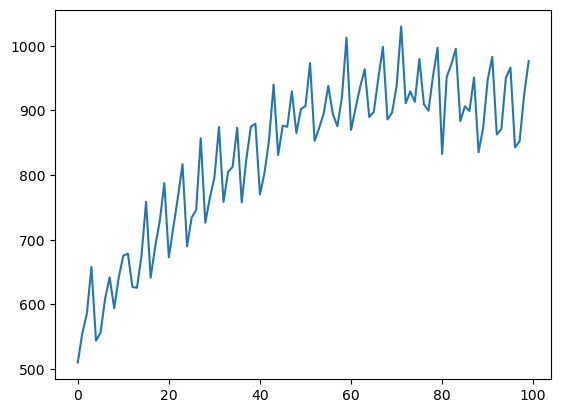

In [20]:
nl.y.plot()
plt.show()

In [22]:
reg1 = smf.ols('y ~ t + C(quarter)', data=nl).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     94.04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           3.60e-32
Time:                        14:55:14   Log-Likelihood:                -542.98
No. Observations:                 100   AIC:                             1096.
Df Residuals:                      95   BIC:                             1109.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         607.7997     14.860     40.902      0.000     578.299     637.300
C(quarter)[T.2]    27.2616     16.018      1.702      0.092      -4.539      59.062
C(quarter)[T.3]    58.9130     16.022      3.677      0.000      27.106      90.721
C(quarter)[T.4]   109.5688     16.028      6.836      0.000      77.749     141.388
t                   3.4798      0.196     17.725      0.000       3.090       3.870
==============================================================================
Omnibus:                       12.584   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.670
Skew:                          -0.444   Prob(JB):                       0.0356
Kurtosis:                       2.099   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
nl['tsqr'] = nl.t ** 2
nl


,Unnamed: 0,y,t,year,quarter,tsqr
0,0,510.021955,1,2001,1,1
1,1,555.213653,2,2001,2,4
2,2,585.686492,3,2001,3,9
3,3,657.827659,4,2001,4,16
4,4,543.824181,5,2002,1,25
...,...,...,...,...,...,...
95,95,966.218309,96,2024,4,9216
96,96,842.889088,97,2025,1,9409
97,97,852.075832,98,2025,2,9604
98,98,923.766061,99,2025,3,9801


In [24]:
reg2 = smf.ols('y ~ t + tsqr + C(quarter)', data=nl).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     686.8
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.44e-72
Time:                        14:59:26   Log-Likelihood:                -441.79
No. Observations:                 100   AIC:                             895.6
Df Residuals:                      94   BIC:                             911.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         489.3900      7.225     67.735      0.000     475.044     503.735
C(quarter)[T.2]    27.1236      5.854      4.634      0.000      15.501      38.746
C(quarter)[T.3]    58.7750      5.855     10.038      0.000      47.150      70.400
C(quarter)[T.4]   109.5688      5.857     18.706      0.000      97.939     121.199
t                  10.4491      0.290     36.090      0.000       9.874      11.024
tsqr               -0.0690      0.003    -24.847      0.000      -0.075      -0.063
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.067
Skew:                          -0.179   Prob(JB):                        0.356
Kurtosis:                       2.394   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
reg3 = smf.ols('y ~ t + I(t ** 2) + I(t ** 3) + C(quarter)', data=nl).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     571.5
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.44e-71
Time:                        15:01:56   Log-Likelihood:                -441.34
No. Observations:                 100   AIC:                             896.7
Df Residuals:                      93   BIC:                             914.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         494.5869      9.191     53.814      0.000     476.336     512.838
C(quarter)[T.2]    27.2244      5.860      4.646      0.000      15.588      38.861
C(quarter)[T.3]    58.9763      5.864     10.057      0.000      47.331      70.621
C(quarter)[T.4]   109.8708      5.872     18.712      0.000      98.211     121.531
t                   9.8298      0.735     13.365      0.000       8.369      11.290
I(t ** 2)          -0.0538      0.017     -3.185      0.002      -0.087      -0.020
I(t ** 3)          -0.0001      0.000     -0.916      0.362      -0.000       0.000
==============================================================================
Omnibus:                        2.528   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.035
Skew:                          -0.208   Prob(JB):                        0.362
Kurtosis:                       2.439   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

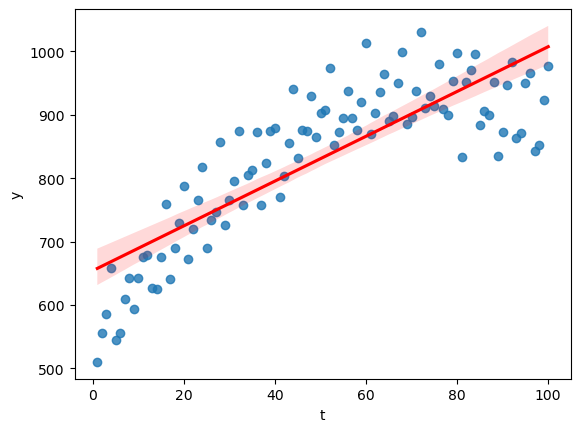

In [31]:
sns.regplot(x=nl.t, y=nl.y, line_kws={'color': 'red'}, order = 1)
plt.show()

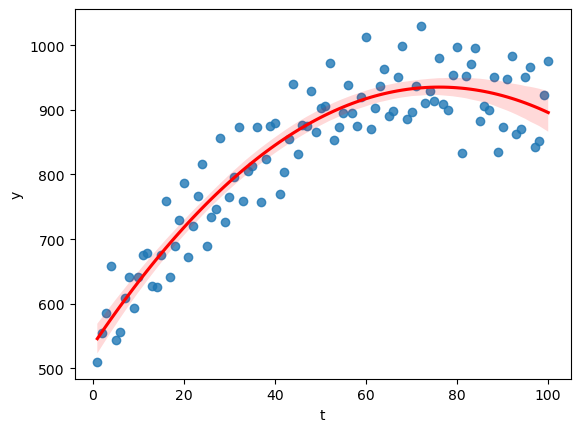

In [30]:
sns.regplot(x=nl.t, y=nl.y, line_kws={'color': 'red'}, order = 2)
plt.show()

# April 25th

In [34]:
# Normalization -> Z-score

In [35]:
# K means algorithm
# Clustering

# April 27th

Recommendations

1. Past Observation =>  2. Preference => 3. Sample of Similar Observations => 4. List of Recommendations => Go to 1.

In [39]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [37]:
wine = pd.read_csv('data/wine-clustering.csv')

In [38]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


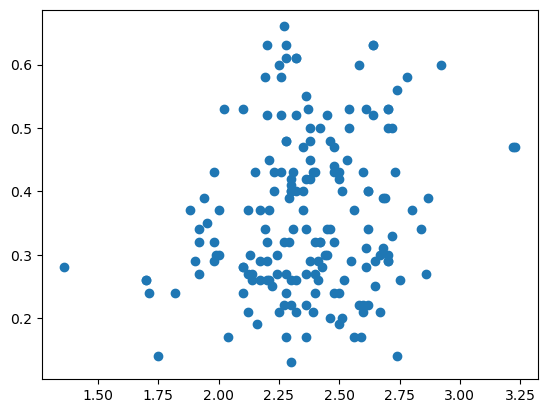

In [42]:
plt.scatter(x=wine.Ash, y=wine.Nonflavanoid_Phenols)
plt.show()

In [52]:
## PREPROCESSING

### NUMERICAL VARIABLES

wine['abc'] = 'a'
wine = wine.select_dtypes(include = 'number')
wine

### SCALE
from sklearn.preprocessing import scale
wineZ = pd.DataFrame(scale(wine))
wineZ.columns = wine.columns
wineZ

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [54]:
# FIND CLUSTERS
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 1).fit(wineZ)

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
# EXTRACT
## CENTROIDS

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = wine.columns
centroids

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


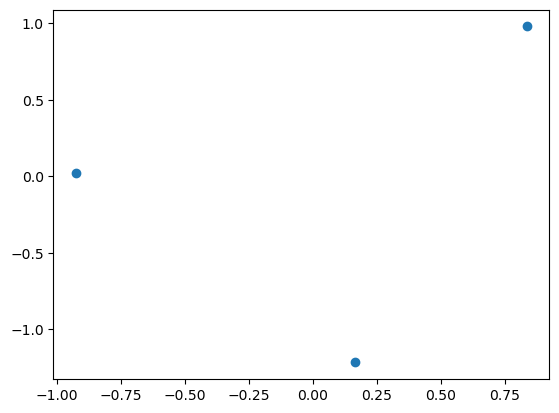

In [58]:
plt.scatter(x=centroids.Alcohol, y=centroids.Flavanoids)
plt.show()

In [59]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [60]:
# EXTRACT
## LABELS

wineZ['cluster'] = pd.Series(kmeans.labels_)
wineZ

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1


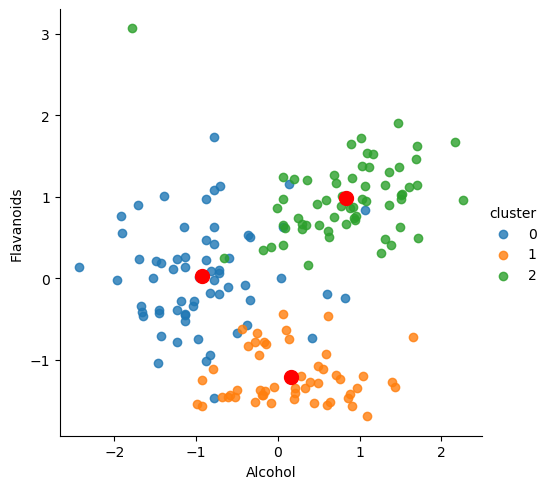

In [65]:
sns.lmplot(x='Alcohol', y='Flavanoids', hue='cluster', data=wineZ, fit_reg=False)
plt.scatter(x=centroids.Alcohol, y=centroids.Flavanoids, color='red', s=100)
plt.show()

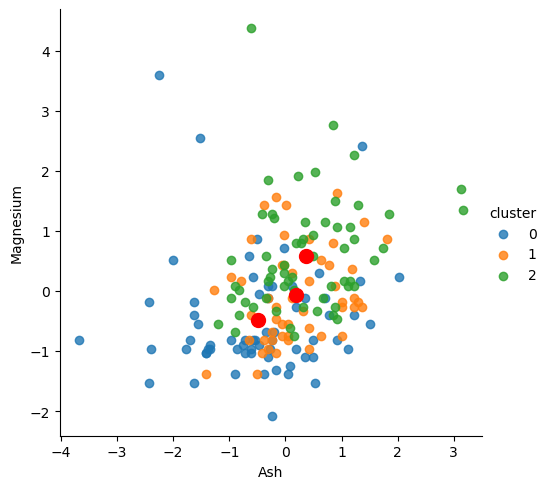

In [66]:
sns.lmplot(x='Ash', y='Magnesium', hue='cluster', data=wineZ, fit_reg=False)
plt.scatter(x=centroids.Ash, y=centroids.Magnesium, color='red', s=100)
plt.show()

In [72]:
# INITIAL DATA

sample0 = wineZ[wineZ.cluster == 0].sample(18)
sample1 = wineZ[wineZ.cluster == 1].sample(5)
sample2 = wineZ[wineZ.cluster == 2].sample(1)

customer = pd.concat([sample0, sample1, sample2])

In [73]:
customer.drop(columns=['cluster'], inplace=True)

In [75]:
# PREFERENCE

preference = pd.DataFrame(customer.mean()).T
preference

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.393989,0.164857,-0.448755,0.177936,-0.133984,-0.243868,-0.177053,0.173077,-0.059248,-0.471937,-0.018059,-0.008266,-0.695339


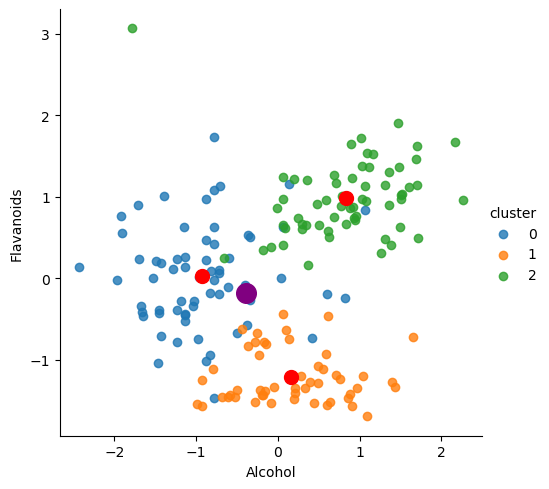

In [77]:
sns.lmplot(x='Alcohol', y='Flavanoids', hue='cluster', data=wineZ, fit_reg=False)
plt.scatter(x=centroids.Alcohol, y=centroids.Flavanoids, color='red', s=100)
plt.scatter(x=preference.Alcohol, y=preference.Flavanoids, color='purple', s=200)
plt.show()

In [79]:
from sklearn.metrics.pairwise import euclidean_distances

# Make sure you have no 'cluster' variable
# preference = preference.drop('cluster', axis=1)

euclidean_distances(preference, centroids)

# LOWER = CLOSER

array([[1.1601118 , 2.97117823, 3.41583854]])

In [87]:
## SAMPLE

wineZ[wineZ.cluster == 0].sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
79,-0.371343,1.376703,0.122392,1.052516,0.088358,0.857067,0.522796,0.549108,0.629175,-1.076273,1.020278,0.732090,-0.904056,0
69,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010,0
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540,0
110,-1.903071,1.260006,-1.997705,0.001518,0.509638,1.417883,0.552915,-0.981875,3.485073,-0.933525,-0.910151,0.280108,-0.588791,0
63,-0.778980,-1.082894,-0.754890,-0.148624,-0.894628,1.930629,1.074978,-1.384766,0.489009,-0.263041,1.151898,0.364855,-1.040990,0


In [95]:
# wineZ.drop(columns='cluster', inplace=True)
euclidean_distances(preference, wineZ)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 13 while Y.shape[1] == 14

In [90]:
wineZ['d']= pd.DataFrame(euclidean_distances(preference, wineZ)[0])
wineZ

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 13 while Y.shape[1] == 14

In [94]:
wineZ[wineZ.d < wineZ.d.quantile(0.2)].sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,d
41,0.505695,1.349773,-0.901103,-0.208681,-0.683988,0.248181,0.653312,-0.740141,-0.194304,-0.336578,-0.208177,0.548472,0.917474,2.760339
108,-0.964270,-0.939268,-1.559065,-0.148624,-0.543562,0.103972,0.010773,0.226796,0.856946,-1.020039,-0.427544,0.576721,-1.384915,2.309953
65,-0.778980,-1.011081,0.707247,-0.418881,-0.122282,0.200111,0.623193,0.065639,0.856946,-0.198156,1.020278,-0.440238,-0.219390,2.545272
72,0.604516,-0.607133,-0.462462,1.352801,-0.894628,-0.665148,-0.190020,-0.740141,-0.982742,-0.570166,0.098937,0.237735,-0.875396,2.352188
88,-1.680724,-0.248068,0.341713,0.632117,-1.105268,-0.552984,-0.340615,0.951998,-0.422075,-0.976782,0.186684,0.195361,-0.213021,2.243269


In [96]:
# Is Cluster Algorithm the best algorithm for recommendation system?

In [97]:
## Time Trends
## Seasonality
## Correct Polynomial Specification
## K Means Algorithm
## Forecasts with 95% Confidence Intervals
## Centroids